# KNN算法与一些聚类算法解决流形二分类问题

###                                                                盛焕新  15220202202189

## 一、调用需要使用到的Python包

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 二、读取训练集和测试集数据

In [2]:
#训练集
dt_train = pd.read_csv('./数据/TrainingData.csv', usecols=['0', '1'])
lb_train = pd.read_csv('./数据/TrainingLabels.csv', usecols=['0'])['0']
#测试集
dt_test = pd.read_csv('./数据/TestingData.csv', usecols=['0', '1'])
lb_test = pd.read_csv('./数据/TestingLabels.csv', usecols=['0'])['0']
#其中，dt表示数据，lb表示类标签

## 三、编写KNN算法函数

In [3]:
class KNeighborsClassifier():
    """ 
    借鉴了网络上公开资料，编写此KNN算法
    """
    def __init__(self, dt_train, lb_train, n_neighbors=5, method='educlidean'):
        """
        dt_train:       训练集数据,     dt表示data，        点的数据
        lb_train:       训练集类别，    lb表示label，       类型数据
        n_neighbors:    最近邻的个数,   默认为5，           可以修改
        method:         距离计算方式,   默认为欧几里得距离，可以修改
        """
        self.n_neighbors = n_neighbors
        self.dt_train = dt_train.values
        self.lb_train = lb_train
        self.method = method        
        #数据标准化：
        self.mean = self.dt_train.mean(axis=0)
        self.std = self.dt_train.std(axis=0)
        self.dt_train = (self.dt_train - self.mean) / self.std
            
    def predict(self, dt_test):
        """
        self:           导入数据
        dt_test:        测试集数据
        """
        lb_preds = []
        dt_test = (dt_test - self.mean) / self.std
        
        for i in dt_test.values:
            #欧几里得距离
            if self.method == 'educlidean':
                distance = (((self.dt_train - i)**2).sum(axis=1)**0.5)
            #曼哈顿距离
            elif self.method == 'manhattan':
                distance = (np.abs(self.dt_train - i)).sum(axis=1)
            #切比雪夫距离
            elif self.method == 'chebyshev':
                distance = (np.abs(self.dt_train - i)).max(axis=1)
            k_neighbors_index = np.argsort(distance)[: self.n_neighbors]
            lb_pred = self.lb_train.iloc[k_neighbors_index].mode().item()
            lb_preds.append(lb_pred)
        return pd.Series(lb_preds, name=self.lb_train.name)

## 四、参数选定及交叉验证

In [4]:
from sklearn.model_selection import StratifiedKFold

for n_neighbors in [1,2,3,4,5,6,7,8,9,10]:
    for method in ['educlidean', 'manhattan', 'chebyshev']:
        score = []
        skf = StratifiedKFold(n_splits=10, 
                              shuffle=True, 
                              random_state=39)
        for train_index, validation_index in skf.split(dt_train, lb_train):
            dt_train_1 = dt_train.loc[train_index]
            lb_train_1 = lb_train.loc[train_index]
            dt_validation = dt_train.loc[validation_index]
            lb_validation = lb_train.loc[validation_index]
            knn = KNeighborsClassifier(dt_train_1, 
                                       lb_train_1, 
                                       n_neighbors=n_neighbors, 
                                       method=method)
            lb_pred = knn.predict(dt_validation)
            score.append(accuracy_score(lb_validation, lb_pred))
        print(f'n_neighbors = {n_neighbors}, method = {method}, accuracy = {np.mean(score)}')

n_neighbors = 1, method = educlidean, accuracy = 1.0
n_neighbors = 1, method = manhattan, accuracy = 1.0
n_neighbors = 1, method = chebyshev, accuracy = 1.0
n_neighbors = 2, method = educlidean, accuracy = 1.0
n_neighbors = 2, method = manhattan, accuracy = 1.0
n_neighbors = 2, method = chebyshev, accuracy = 1.0
n_neighbors = 3, method = educlidean, accuracy = 1.0
n_neighbors = 3, method = manhattan, accuracy = 1.0
n_neighbors = 3, method = chebyshev, accuracy = 1.0
n_neighbors = 4, method = educlidean, accuracy = 1.0
n_neighbors = 4, method = manhattan, accuracy = 1.0
n_neighbors = 4, method = chebyshev, accuracy = 1.0
n_neighbors = 5, method = educlidean, accuracy = 1.0
n_neighbors = 5, method = manhattan, accuracy = 1.0
n_neighbors = 5, method = chebyshev, accuracy = 1.0
n_neighbors = 6, method = educlidean, accuracy = 1.0
n_neighbors = 6, method = manhattan, accuracy = 1.0
n_neighbors = 6, method = chebyshev, accuracy = 1.0
n_neighbors = 7, method = educlidean, accuracy = 1.0
n_nei

### 1、选取7邻居时、切比雪夫距离下的KNN分类结果：

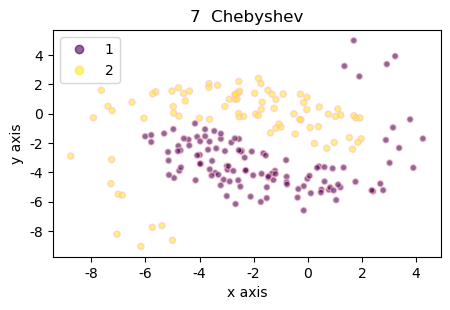

In [5]:
knn = KNeighborsClassifier(dt_train, 
                           lb_train, 
                           n_neighbors=7, 
                           method='chebyshev')
lb_pred = knn.predict(dt_test)

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(5, 3), dpi=100)

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('7  Chebyshev')

scatter = plt.scatter(dt_test.loc[:, '0'], 
                      dt_test.loc[:, '1'], 
                      c=lb_pred, 
                      s=20, 
                      edgecolors='pink', 
                      alpha=0.6)
plt.legend(*scatter.legend_elements())
plt.show()

### 2、选取6邻居时、曼哈顿距离下的KNN分类结果：

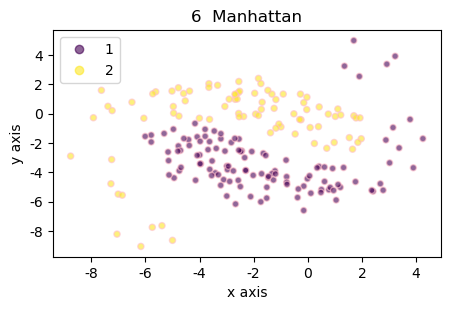

In [6]:
knn = KNeighborsClassifier(dt_train, 
                           lb_train, 
                           n_neighbors=6, 
                           method='manhattan')
lb_pred = knn.predict(dt_test)

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(5, 3), dpi=100)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('6  Manhattan')

scatter = plt.scatter(dt_test.loc[:, '0'], 
                      dt_test.loc[:, '1'], 
                      c=lb_pred, 
                      s=20, 
                      edgecolors='pink', 
                      alpha=0.6)
plt.legend(*scatter.legend_elements())
plt.show()

### 3、选取5邻居时、欧几里得距离下的KNN分类结果：

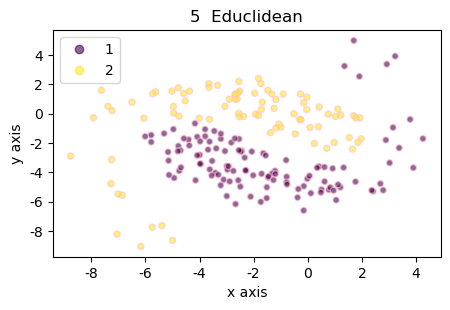

In [7]:
knn = KNeighborsClassifier(dt_train, 
                           lb_train, 
                           n_neighbors=5, 
                           method='educlidean')
lb_pred = knn.predict(dt_test)

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(5, 3), dpi=100)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('5  Educlidean')

scatter = plt.scatter(dt_test.loc[:, '0'], 
                      dt_test.loc[:, '1'], 
                      c=lb_pred, 
                      s=20, 
                      edgecolors='pink', 
                      alpha=0.6)
plt.legend(*scatter.legend_elements())
plt.show()

## 五、模型检验

### 1、混淆矩阵

In [8]:
print(confusion_matrix(lb_test, lb_pred))

[[116   0]
 [  0  84]]


### 2、分类报告

In [9]:
print(classification_report(y_true=lb_test, y_pred=lb_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       116
         2.0       1.00      1.00      1.00        84

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## 六、聚类算法尝试

In [10]:
X = dt_test.values

from numpy import unique
from numpy import where
from matplotlib import pyplot
%matplotlib inline

### 1、聚合聚类

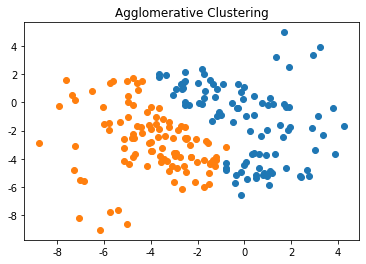

In [34]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
label = model.fit_predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('Agglomerative Clustering')
pyplot.show()

### 2、平衡迭代BIRCH聚类

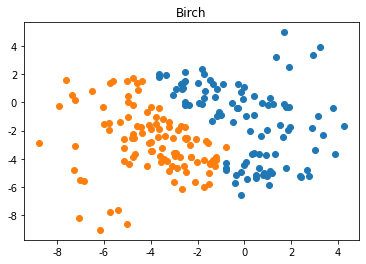

In [33]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=2)
model.fit(X)
label = model.predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('Birch')
pyplot.show()

### 3、K-Means

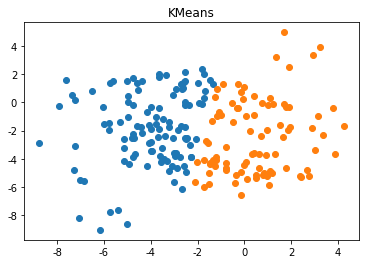

In [32]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X)
label = model.predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('KMeans')
pyplot.show()

### 4、高斯混合模型

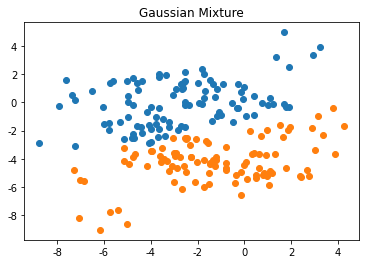

In [31]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2)
label = model.fit_predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('Gaussian Mixture')
pyplot.show()

### 5、Mini-batch k-Means

E:\major\IT\Python\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


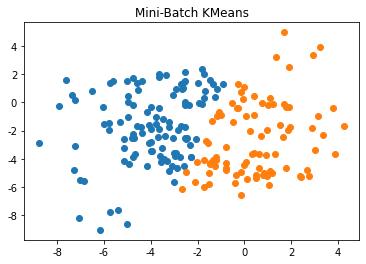

In [30]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=2)
model.fit(X)
label = model.predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

plt.title('Mini-Batch KMeans')
pyplot.show()

### 6、亲和力传播聚类

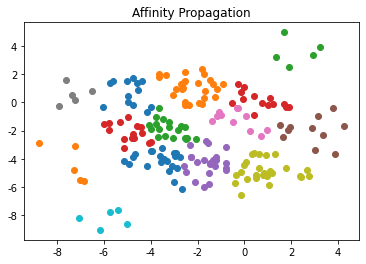

In [28]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
model.fit(X)
label = model.predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('Affinity Propagation')
pyplot.show()

### 7、optics聚类

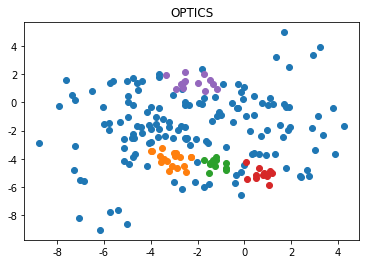

In [27]:
from sklearn.cluster import OPTICS
model = OPTICS(eps=0.8, min_samples=10)
label = model.fit_predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('OPTICS')
pyplot.show()

### 8、光谱聚类

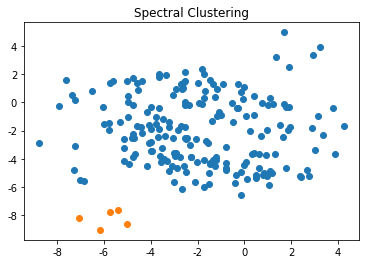

In [26]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2)
label = model.fit_predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('Spectral Clustering')
pyplot.show()

### 9、DBSCAN

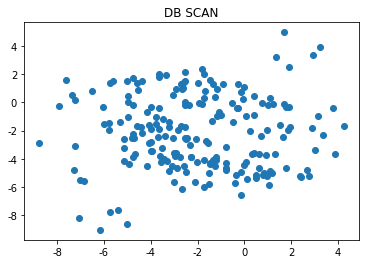

In [24]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)
label = model.fit_predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('DB SCAN')
pyplot.show()

### 10、均值漂移聚类

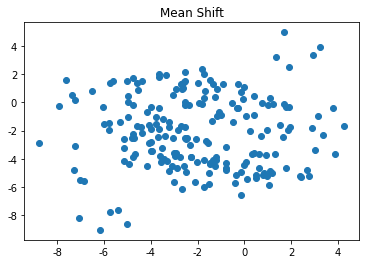

In [25]:
from sklearn.cluster import MeanShift
model = MeanShift()
label = model.fit_predict(X)
clusters = unique(label)
for cluster in clusters:
    row_ix = where(label == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
plt.title('Mean Shift')
pyplot.show()